In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
year = []
for i in range(1998, 2015):
    year.append(i)

col_names_recipe = ["recipe_id", "name"]
col_names_ingredient = ["recipe_id", "ingredient"]

true_array = [[], [], [], [], []]
false_array = [[], [], [], [], []]

dish_name = ["salad", "pasta", "doria", "pizza", "carpaccio"]


for i in year:
    # recipeファイルを読み込む
    recipe = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv",
                            names=col_names_recipe, usecols=[0, 2])
    recipe.dropna(inplace=True)

    # 特定の料理を抽出する
    salad = recipe.query('name.str.contains("サラダ|さらだ")', engine="python")
    pasta = recipe.query('name.str.contains("パスタ|スパゲッティ｜スパゲティ|ペンネ|ペペロンチーノ|カルボナーラ|ボロネーゼ")', engine="python")
    doria = recipe.query('name.str.contains("ドリア|グラタン|リゾット")', engine="python")
    pizza = recipe.query('name.str.contains("ピザ|ピッザ|ピッツァ")', engine="python")
    carpaccio = recipe.query('name.str.contains("カルパッチョ|かるぱっちょ")', engine="python")

    dish_array = [salad, pasta, doria, pizza, carpaccio]


    # ingredientファイルを読み込む
    ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                             names=col_names_ingredient, usecols=[0, 1])

    # ingredientからオリーブオイルの行だけ抽出する
    ingredient_olive = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]


    # reportファイルを読み込む
    report = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/report 2/report{i}.csv",
                         names=["recipe_id"], usecols=[0])

    # オリーブオイルを使ったレシピのつくレポだけ抽出する
    report = report[report["recipe_id"].isin(ingredient_olive["recipe_id"])]
    vc = report['recipe_id'].value_counts()


    # オリーブオイルを使ったレシピだけで料理とingredientを結合
    # recipe_idだけ必要なので、オリーブオイルのデータは削除する
    # 差を求めて、オリーブオイルを使っていないrecipe_idのデータセットも作成する
    # _tはオリーブオイルを使っていることを示し（true）、_fは使っていないことを示す（false）

    for j in range(len(dish_array)):
        dish_array[j] = pd.merge(dish_array[j], ingredient_olive, on="recipe_id", how="left")
        dish_array[j] = dish_array[j].assign(report_qty=0)

    for j in range(len(dish_array)):
        for k in range(len(dish_array[j])):
            try:
                dish_array[j]["report_qty"][k] = vc[dish_array[j]["recipe_id"][k]]
            except:
                continue


    true_index = [[], [], [], [], []]
    false_index = [[], [], [], [], []]


    for j in range(len(dish_array)):
        for k in range(len(dish_array[j])):
            if type(dish_array[j]['ingredient'][k]) == float:
                false_index[j].append(k)
            else:
                true_index[j].append(k)
        true_array[j] = np.append(true_array[j], dish_array[j].iloc[true_index[j], [3]].values.T)
        false_array[j] = np.append(false_array[j], dish_array[j].iloc[false_index[j], [3]].values.T)


sample_size_true = [len(true_array[i]) for i in range(len(true_array))]
sample_size_false = [len(false_array[i]) for i in range(len(false_array))]

In [71]:
total_size_true = 0
total_size_false = 0
for i in range(len(sample_size_false)):
    total_size_true += sample_size_true[i]
    total_size_false += sample_size_false[i]

In [ ]:
total_size_true = 0
total_size_true = 0sample_size_false

In [72]:
points = [(true_array[i], false_array[i]) for i in range(len(dish_array))]

In [73]:
total_true = true_array[0]
total_false = false_array[0]
for i in range(1, len(dish_array)):
    total_true = np.append(total_true, true_array[i])
    total_false = np.append(total_false, false_array[i])
total_points = (total_true, total_false)

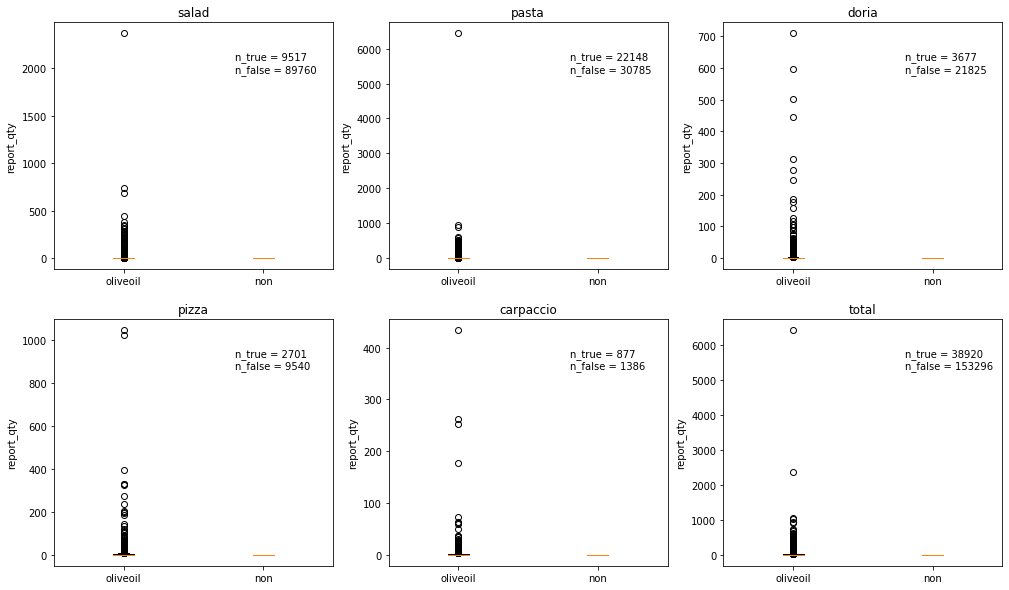

In [78]:
fig = plt.figure(figsize=(17.0, 10.0))

for i in range(len(dish_array)):
    ax = fig.add_subplot(2, 3, i+1)
    bp = ax.boxplot(points[i])
    ax.set_xticklabels(["oliveoil", "non"])
    ax.text(0.65, 0.80, f"n_true = {sample_size_true[i]}\nn_false = {sample_size_false[i]}", size = 10, transform=ax.transAxes)
    plt.title(dish_name[i])
    plt.ylabel("report_qty")

ax = fig.add_subplot(2, 3, 6)
bp = ax.boxplot(total_points)
ax.set_xticklabels(["oliveoil", "non"])
ax.text(0.65, 0.80, f"n_true = {total_size_true}\nn_false = {total_size_false}", size = 10, transform=ax.transAxes)
plt.title("total")
plt.ylabel("report_qty")

plt.savefig()